In [1]:
# Importar todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:/Users/ana_v/OneDrive/Área de Trabalho/GitHub/breastcancer-classification/GEO Repository/GSE25066.csv", low_memory=False)
df

,sample,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM615096,LumA,12.359267,8.021741,8.294244,10.840949,7.874062,8.341292,8.256335,6.485966,...,9.047564,11.274337,17.356685,17.004035,3.882092,4.345965,5.363505,2.262616,3.963081,2.511676
1,GSM615097,Normal,12.613243,7.842947,5.474758,11.715159,7.347955,9.419005,7.983681,7.330512,...,8.765575,11.287301,18.404677,18.143576,4.319704,4.686218,4.604493,3.064326,4.201127,2.657320
2,GSM615098,Basal,11.551397,8.776267,8.197121,10.715077,6.523880,9.297479,7.820261,6.423794,...,9.450242,11.308490,16.304500,15.988321,4.025823,5.339677,4.950814,4.890142,4.014649,2.802313
3,GSM615099,Basal,11.828700,9.523877,7.907263,10.750475,6.478643,8.698516,7.526617,7.276040,...,8.466331,10.208604,16.190139,15.807992,4.651150,4.270966,5.020021,3.692463,4.490109,3.305651
4,GSM615100,LumA,11.983987,6.836237,8.625010,10.827725,7.336754,9.599059,8.312127,6.832232,...,8.721290,11.110014,16.767231,16.485521,4.995794,5.387855,5.055784,5.843128,3.132794,3.661308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,GSM615824,Normal,11.900511,7.908133,8.669415,11.107900,7.381252,9.367477,8.161828,7.474225,...,8.240381,10.394342,16.352939,15.868306,5.734353,6.022961,5.109874,1.727617,6.143987,3.419722
504,GSM615825,LumA,11.743730,9.206188,8.704715,10.817337,7.556436,9.359459,7.818077,7.218218,...,9.539896,10.560753,15.884024,15.280098,5.684635,4.676712,5.640400,4.847598,3.282824,3.527458
505,GSM615826,LumA,11.763716,8.675637,8.216023,10.596750,6.840312,9.642787,7.412919,7.579046,...,8.268165,9.211481,15.336722,14.915171,5.407480,4.160679,3.553616,4.913443,5.484798,2.519045
506,GSM615827,Normal,10.838269,7.985254,8.092749,11.253446,7.598196,9.082484,8.112567,7.139708,...,7.893523,10.484078,16.161536,15.487191,3.805443,3.990518,5.429430,1.659752,4.797590,3.273481


In [3]:
# Contagem de ocorrências de cada rótulo
label_counts = df['type'].value_counts()

print("Contagem de rótulos:")
print(label_counts)

Contagem de rótulos:
type
Basal     189
LumA      160
LumB       78
Normal     44
Her2       37
Name: count, dtype: int64


In [3]:
df_pca = df
df_pca = df_pca.drop(columns=["sample"])
df_pca = df_pca.drop(columns=["type"])
df_pca

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,12.359267,8.021741,8.294244,10.840949,7.874062,8.341292,8.256335,6.485966,6.495728,7.063123,...,9.047564,11.274337,17.356685,17.004035,3.882092,4.345965,5.363505,2.262616,3.963081,2.511676
1,12.613243,7.842947,5.474758,11.715159,7.347955,9.419005,7.983681,7.330512,7.332244,7.033859,...,8.765575,11.287301,18.404677,18.143576,4.319704,4.686218,4.604493,3.064326,4.201127,2.657320
2,11.551397,8.776267,8.197121,10.715077,6.523880,9.297479,7.820261,6.423794,10.066291,6.661108,...,9.450242,11.308490,16.304500,15.988321,4.025823,5.339677,4.950814,4.890142,4.014649,2.802313
3,11.828700,9.523877,7.907263,10.750475,6.478643,8.698516,7.526617,7.276040,10.399704,6.642930,...,8.466331,10.208604,16.190139,15.807992,4.651150,4.270966,5.020021,3.692463,4.490109,3.305651
4,11.983987,6.836237,8.625010,10.827725,7.336754,9.599059,8.312127,6.832232,7.090151,7.081613,...,8.721290,11.110014,16.767231,16.485521,4.995794,5.387855,5.055784,5.843128,3.132794,3.661308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,11.900511,7.908133,8.669415,11.107900,7.381252,9.367477,8.161828,7.474225,8.445318,6.837486,...,8.240381,10.394342,16.352939,15.868306,5.734353,6.022961,5.109874,1.727617,6.143987,3.419722
504,11.743730,9.206188,8.704715,10.817337,7.556436,9.359459,7.818077,7.218218,8.007647,6.902983,...,9.539896,10.560753,15.884024,15.280098,5.684635,4.676712,5.640400,4.847598,3.282824,3.527458
505,11.763716,8.675637,8.216023,10.596750,6.840312,9.642787,7.412919,7.579046,7.749030,6.708932,...,8.268165,9.211481,15.336722,14.915171,5.407480,4.160679,3.553616,4.913443,5.484798,2.519045
506,10.838269,7.985254,8.092749,11.253446,7.598196,9.082484,8.112567,7.139708,9.324205,7.000705,...,7.893523,10.484078,16.161536,15.487191,3.805443,3.990518,5.429430,1.659752,4.797590,3.273481


In [4]:
table=df_pca.T 
sd=np.std(table)
mean=np.mean(table)
numerator=table-mean 
z_score=numerator/sd
df_pca_norm=z_score.T 
df_pca_norm

C:\Users\ana_v\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1.927989,0.006722,0.127425,1.255464,-0.058691,0.148264,0.110633,-0.673535,-0.669212,-0.417889,...,0.461101,1.447429,4.141548,3.985345,-1.826897,-1.621429,-1.170719,-2.544229,-1.791024,-2.433910
1,1.963198,-0.069728,-1.078964,1.580468,-0.280676,0.601930,-0.009752,-0.288110,-0.287371,-0.414532,...,0.323462,1.398130,4.431297,4.320025,-1.571207,-1.415011,-1.449840,-2.106203,-1.621740,-2.279654
2,1.545129,0.335499,0.083060,1.180592,-0.646276,0.562686,-0.081207,-0.689902,0.897797,-0.586461,...,0.629272,1.439250,3.616921,3.479104,-1.735135,-1.162449,-1.331947,-1.358393,-1.740005,-2.268441
3,1.672491,0.663946,-0.043453,1.200681,-0.668589,0.302784,-0.210016,-0.319664,1.047190,-0.596700,...,0.201184,0.963568,3.580970,3.413751,-1.468264,-1.634625,-1.306853,-1.887766,-1.538732,-2.057028
4,1.736403,-0.510925,0.269991,1.231620,-0.292416,0.695227,0.133397,-0.512673,-0.400075,-0.403802,...,0.312024,1.354857,3.824600,3.701616,-1.314398,-1.143238,-1.288208,-0.944481,-2.127718,-1.896988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,1.673030,-0.042292,0.284792,1.332485,-0.268665,0.584714,0.066709,-0.228719,0.188510,-0.502294,...,0.100459,1.025906,3.586011,3.377789,-0.976254,-0.852254,-1.244561,-2.697744,-0.800255,-1.970733
504,1.671931,0.536687,0.312338,1.257482,-0.201379,0.605257,-0.084326,-0.352690,0.000484,-0.493720,...,0.685981,1.142691,3.524213,3.254030,-1.038784,-1.489708,-1.058574,-1.413257,-2.113305,-2.003861
505,1.710414,0.304590,0.095354,1.179162,-0.530928,0.744878,-0.270253,-0.194625,-0.117241,-0.590738,...,0.119091,0.548529,3.336999,3.145091,-1.183214,-1.750811,-2.027172,-1.408121,-1.148016,-2.498153
506,1.220827,-0.009188,0.037156,1.399821,-0.176059,0.463859,0.045700,-0.373727,0.568071,-0.433655,...,-0.048736,1.068125,3.515836,3.225107,-1.811222,-1.731430,-1.111075,-2.736289,-1.383479,-2.040565


In [13]:
pip install xlsxwriter

  Obtaining dependency information for xlsxwriter from https://files.pythonhosted.org/packages/4f/64/42063c82918475ce0a63fa19063607e60969b1498ccd4220274cf808fc60/XlsxWriter-3.1.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/154.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/154.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/154.3 kB ? eta -:--:--
   ------- ------------------------------- 30.7/154.3 kB 325.1 kB/s eta 0:00:01
   ------------------------------ ------- 122.9/154.3 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- 154.3/154.3 kB 837.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Supondo que df_pca_norm é o seu DataFrame normalizado
scaling = StandardScaler()
Scaled_data = scaling.fit_transform(df_pca_norm)

# Aplica a PCA
pca = PCA(n_components=0.8) 
pca.fit(Scaled_data)

# Componentes Principais (Eigenvectors)
df_eigenvectors = pd.DataFrame(pca.components_, columns=df_pca_norm.columns)

# Autovalores (Eigenvalues)
df_eigenvalues = pd.DataFrame({"Eigenvalues": pca.explained_variance_})

# Variância explicada percentual
df_variance_percent = pd.DataFrame({"Variance Percent": 
    pca.explained_variance_ratio_ * 100})

# Variância explicada cumulativa percentual
cumulative_variance_percent = np.cumsum(pca.explained_variance_ratio_ * 100)
df_cumulative_variance_percent = pd.DataFrame({"Cumulative Variance Percent": 
    cumulative_variance_percent})

# Número de dimensões para 80% de variância cumulativa
num_dimensions_for_80_percent = np.argmax(cumulative_variance_percent>=80)+1

# Combinar os DataFrames
df_combined = pd.concat([df_eigenvectors, df_eigenvalues, 
                         df_variance_percent, df_cumulative_variance_percent], 
                        axis=1)

# Salvar como um arquivo CSV
df_combined.to_csv('informacoes_pca.csv', index=False)

# Imprimir o número de dimensões necessárias
print(f'N de dim p/ 80% de var cumulativa: {num_dimensions_for_80_percent}')


N de dim p/ 80% de var cumulativa: 260


In [6]:
principal=PCA(n_components=260)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)
dim = pd.DataFrame(data=x)
dim

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,3.038694,22.537583,-59.692536,-29.473233,-1.179612,18.126789,11.879088,17.373902,-10.942067,9.861466,...,-10.138985,-3.175587,-1.323087,-0.585961,-2.718313,3.180902,-5.704709,-1.008689,1.914016,-10.486343
1,-49.284770,2.743951,-72.218513,-10.209267,22.668494,8.754996,1.725196,3.020845,13.421013,10.278646,...,-2.462159,2.851568,-5.850942,-1.915987,7.527272,8.137245,-7.987452,4.579549,-3.156664,4.940712
2,23.930955,-63.708034,-14.481021,-18.860633,11.411615,-7.368748,-3.055005,1.640011,-9.848779,21.659542,...,1.678908,-0.521270,3.094778,1.322256,-4.602322,-1.025159,-2.381498,4.815217,2.918976,0.850634
3,12.920835,-52.957337,-24.787379,-10.007765,8.300736,-11.893061,9.003034,2.318441,-5.750826,16.248963,...,10.245487,9.804757,-0.473138,-1.848374,1.464651,-7.015411,-9.570092,-6.907816,-2.145227,-1.527671
4,3.205064,-8.187546,-57.722841,-2.392992,28.202562,-13.224361,-14.482198,-2.935805,-21.549959,5.342436,...,6.369512,-1.182584,6.886277,-1.771922,0.417998,5.715040,-4.365669,-4.698458,3.072563,-3.022887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,-30.452839,-9.343377,-39.100804,29.481792,20.723540,-41.385926,4.805420,-5.846790,35.097037,3.732094,...,4.195630,-2.953254,1.018499,3.991872,3.131976,-6.103988,2.471339,3.410749,-3.816163,2.195107
504,8.514057,12.961314,-10.495832,-16.231637,-22.688116,-25.230086,11.549038,-5.993499,-16.165616,-12.694630,...,6.674797,3.422772,1.624744,-2.848107,-4.932373,5.493586,2.710793,0.718608,-7.278879,-5.153718
505,37.179335,-3.004114,-32.092543,5.823347,1.809824,-39.552667,-18.047247,-1.201362,6.136729,-7.731479,...,-0.156681,-2.748729,0.877665,0.835029,-0.965145,1.867356,0.494579,1.568994,4.451373,-0.759912
506,-30.429843,-15.077268,-26.754015,46.481427,25.318543,-61.251014,-7.732497,-16.783224,2.344458,-6.555399,...,-1.450748,-2.264980,5.120357,-0.526111,0.775023,-0.983592,-0.655622,0.934591,2.051232,-1.221607


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [8]:
# Divisão de treino e teste - com 20% para o teste
X_train, X_test, y_train, y_test = train_test_split(dim, df['type'], 
                                                    test_size=0.2, 
                                                    random_state=42)


In [10]:
# Regressão Logística
lr_model = LogisticRegression(max_iter=6500) 
lr_model.fit(X_train, y_train) 
lr_predictions_train = lr_model.predict(X_train)  
lr_predictions_test = lr_model.predict(X_test) 

# Avaliação Regressão Logística
lr_accuracy_train = accuracy_score(y_train, lr_predictions_train) 
lr_accuracy_test = accuracy_score(y_test, lr_predictions_test)  
lr_report = classification_report(y_test, lr_predictions_test)  

# Criar um objeto de validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Substituir a divisão de treino e teste pelo código de validação cruzada
scores = cross_val_score(lr_model, dim, df['type'], cv=cv, scoring='accuracy')

# Imprimir os resultados
print(f'Regressão Logística - Acurácia (Treinamento): {lr_accuracy_train}')
print(f'Regressão Logística - Acurácia (Teste): {lr_accuracy_test}')
print(f'Acurácia média na validação cruzada: {scores.mean()}')
print('')
print(f'Classification Report:\n{lr_report}')

Regressão Logística - Acurácia (Treinamento): 1.0
Regressão Logística - Acurácia (Teste): 0.8235294117647058
Acurácia média na validação cruzada: 0.7952156862745099

Classification Report:
              precision    recall  f1-score   support

       Basal       0.92      0.97      0.95        36
        Her2       1.00      0.33      0.50        12
        LumA       0.79      0.93      0.86        29
        LumB       0.71      0.75      0.73        16
      Normal       0.67      0.67      0.67         9

    accuracy                           0.82       102
   macro avg       0.82      0.73      0.74       102
weighted avg       0.84      0.82      0.81       102



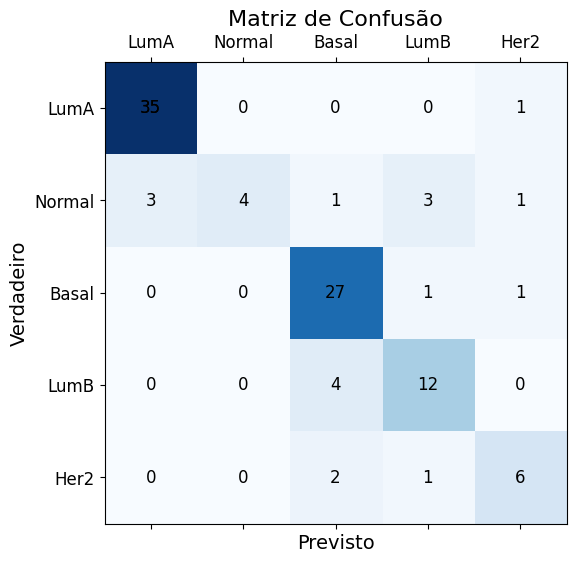

<Figure size 640x480 with 0 Axes>

In [11]:
# Defina as classes com base nos seus dados
classes = df['type'].unique()

# Matriz de Confusão
confusion = confusion_matrix(y_test, lr_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion, cmap='Blues')
def add_text(x, y, val):
    plt.text(x, y, str(val), va='center', ha='center', color='black', 
             fontsize=12)
add_text_vectorized = np.vectorize(add_text)
add_text_vectorized(*np.meshgrid(range(len(classes)), range(len(classes))), 
                    confusion)
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.show()

# Salvar o gráfico como um arquivo PNG
plt.savefig('matrizrl.png', dpi=300) 

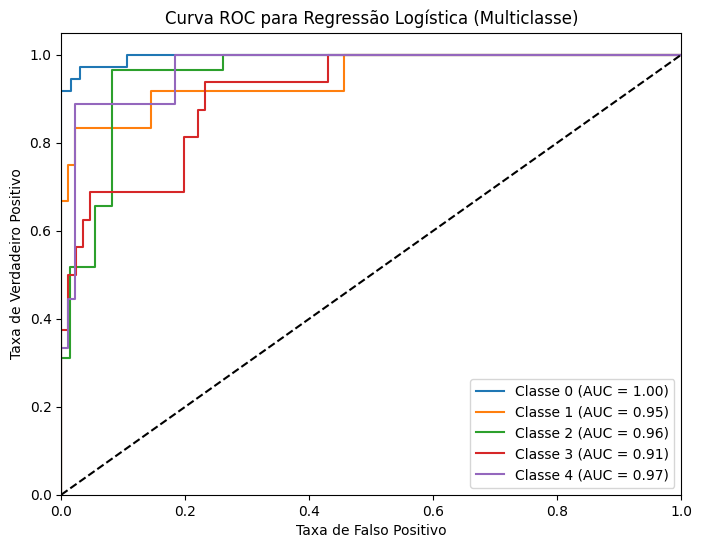

In [10]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Curva ROC para Regressão Logística
y_test_bin = label_binarize(y_test, classes=lr_model.classes_)

probas_ = lr_model.predict_proba(X_test)

# Calcular a curva ROC e a área sob a curva para cada classe
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probas_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC para Regressão Logística (Multiclasse)')
plt.legend(loc="lower right")

# Salvar o gráfico como um arquivo PNG
plt.savefig('curva_roc_geo_regressao.png', dpi=300) 
plt.show()



In [12]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)  
svm_predictions_train = svm_model.predict(X_train) 
svm_predictions_test = svm_model.predict(X_test) 

# Avaliação SVM
svm_accuracy_train = accuracy_score(y_train, svm_predictions_train) 
svm_accuracy_test = accuracy_score(y_test, svm_predictions_test) 
svm_report = classification_report(y_test, svm_predictions_test) 

# Criar um objeto de validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Substituir a divisão de treino e teste pelo código de validação cruzada
scores = cross_val_score(svm_model, dim, df['type'], cv=cv, 
                         scoring='accuracy')

# Exibindo resultados
print(f'SVM - Acurácia (Treinamento): {svm_accuracy_train}')
print(f'SVM - Acurácia (Teste): {svm_accuracy_test}')
print(f'Acurácia média na validação cruzada: {scores.mean()}')
print('')
print(f'Classification Report:\n{svm_report}')

SVM - Acurácia (Treinamento): 0.9729064039408867
SVM - Acurácia (Teste): 0.7254901960784313
Acurácia média na validação cruzada: 0.7676862745098039

Classification Report:
              precision    recall  f1-score   support

       Basal       0.85      0.97      0.91        36
        Her2       1.00      0.08      0.15        12
        LumA       0.66      0.93      0.77        29
        LumB       0.60      0.56      0.58        16
      Normal       0.50      0.22      0.31         9

    accuracy                           0.73       102
   macro avg       0.72      0.55      0.54       102
weighted avg       0.74      0.73      0.68       102



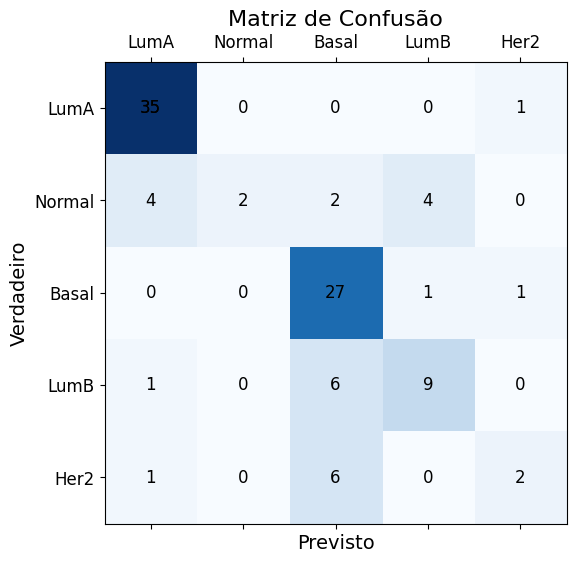

<Figure size 640x480 with 0 Axes>

In [25]:
# Defina as classes com base nos seus dados
classes = df['type'].unique()

# Matriz de Confusão
confusion = confusion_matrix(y_test, svm_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion, cmap='Blues')
def add_text(x, y, val):
    plt.text(x, y, str(val), va='center', ha='center', color='black', 
             fontsize=12)
add_text_vectorized = np.vectorize(add_text)
add_text_vectorized(*np.meshgrid(range(len(classes)), range(len(classes))), 
                    confusion)
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.show()

plt.savefig('matrizsvm.png', dpi=300) 


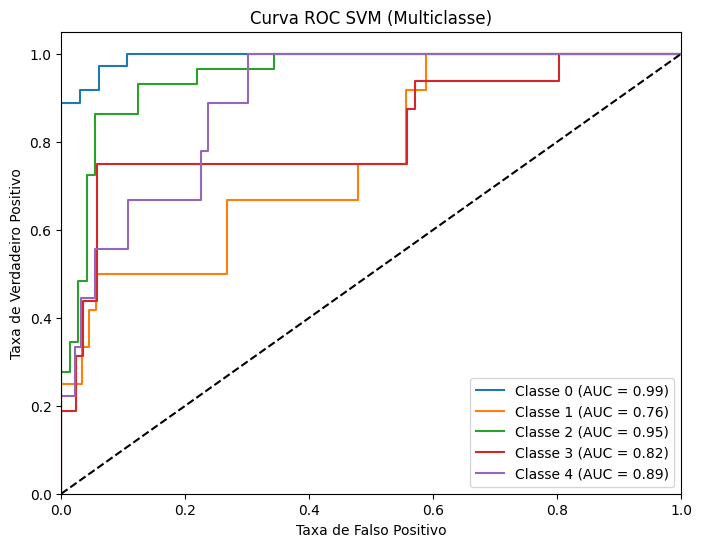

In [12]:
# Calcular a curva ROC e a área sob a curva para cada classe
n_classes = len(svm_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], 
                                  svm_model.decision_function(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC SVM (Multiclasse)')
plt.legend(loc="lower right")
# Salvar o gráfico como um arquivo PNG
plt.savefig('curva_roc_geo_SVM.png', dpi=300) 
plt.show()


In [14]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train) 
rf_predictions_train = rf_model.predict(X_train) 
rf_predictions_test = rf_model.predict(X_test)

# Avaliação Random Forest
rf_accuracy_train = accuracy_score(y_train, rf_predictions_train) 
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test) 
rf_report = classification_report(y_test, rf_predictions_test) 

# Criar um objeto de validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Substituir a divisão de treino e teste pelo código de validação cruzada
scores = cross_val_score(rf_model, dim, df['type'], cv=cv, scoring='accuracy')

#Exibindo resultados
print(f'Random Forest - Acurácia (Treinamento): {rf_accuracy_train}')
print(f'Random Forest - Acurácia (Teste): {rf_accuracy_test}')
print(f'Acurácia média na validação cruzada: {scores.mean()}')
print('')
print(f'Classification Report (Random Forest):\n{rf_report}')

C:\Users\ana_v\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ana_v\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ana_v\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

Random Forest - Acurácia (Treinamento): 1.0
Random Forest - Acurácia (Teste): 0.6274509803921569
Acurácia média na validação cruzada: 0.6497254901960784

Classification Report (Random Forest):
              precision    recall  f1-score   support

       Basal       0.74      0.94      0.83        36
        Her2       0.00      0.00      0.00        12
        LumA       0.52      0.97      0.67        29
        LumB       1.00      0.12      0.22        16
      Normal       0.00      0.00      0.00         9

    accuracy                           0.63       102
   macro avg       0.45      0.41      0.35       102
weighted avg       0.57      0.63      0.52       102



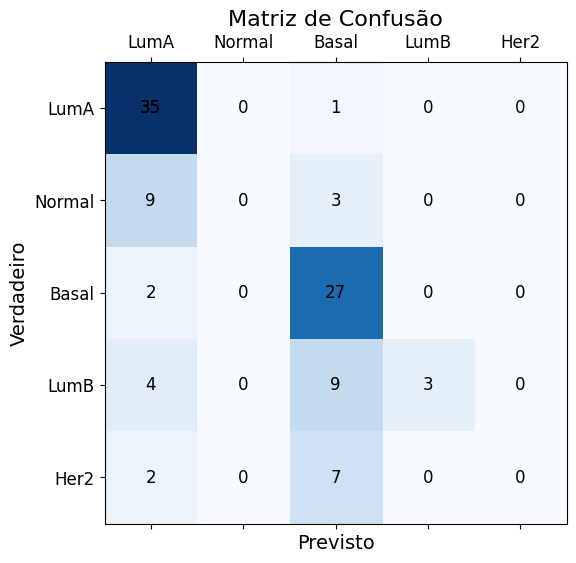

<Figure size 640x480 with 0 Axes>

In [26]:
# Defina as classes com base nos seus dados
classes = df['type'].unique()

# Matriz de Confusão
confusion = confusion_matrix(y_test, rf_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion, cmap='Blues')
def add_text(x, y, val):
    plt.text(x, y, str(val), va='center', ha='center', color='black', 
             fontsize=12)
add_text_vectorized = np.vectorize(add_text)
add_text_vectorized(*np.meshgrid(range(len(classes)), range(len(classes))), 
                    confusion)
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.show()

plt.savefig('matrizrf.png', dpi=300) 
plt.show()

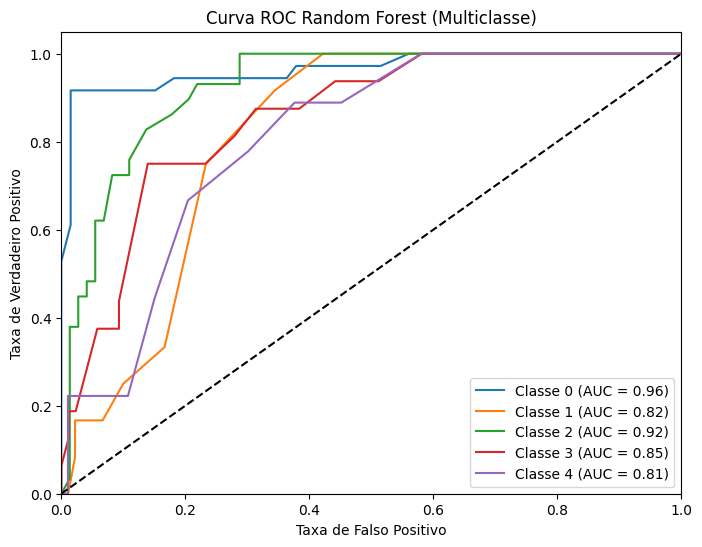

In [14]:
# Calcular a curva ROC e a área sob a curva para cada classe
n_classes = len(rf_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], 
                                  rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC Random Forest (Multiclasse)')
plt.legend(loc="lower right")
# Salvar o gráfico como um arquivo PNG
plt.savefig('curva_roc_geo_random.png', dpi=300)  
plt.show()

